# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_are_we_covering = {1: "data(prepare andload)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating the model(inference)",
                        5: "saving and loading the model",
                        6: "putting it all together"}

print(what_are_we_covering)

{1: 'data(prepare andload)', 2: 'build model', 3: 'fitting the model to data (training)', 4: 'making predictions and evaluating the model(inference)', 5: 'saving and loading the model', 6: 'putting it all together'}


In [2]:
import torch
from torch import nn ## nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.5.1'

## 1. Data (Preparing and Loading)

Data can be almost anything ..... in machine learning.

* Excel sheet
* Images of any kind
* Video eg. youtube has lots of data
* Audio (songs, podcasts)
* Text file
* DNA

### Machine learning is a game of 2 parts:

1. Get the data into a numerical representation.
2. Build models that learn the pattern in that numericall representation. 

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

## Splitting data in train and test sets (one of the most important concepts in machine learning in general)

Lets create training and testing datasets for our model

In [6]:
#create a train-test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

print(len(X_train),len(y_train))
print(len(X_test), len(y_test))

40 40
10 10


How might we better visualize our data?

This is where the data explorer' s motto comes in!

"Visualize, visualize, visualize! "

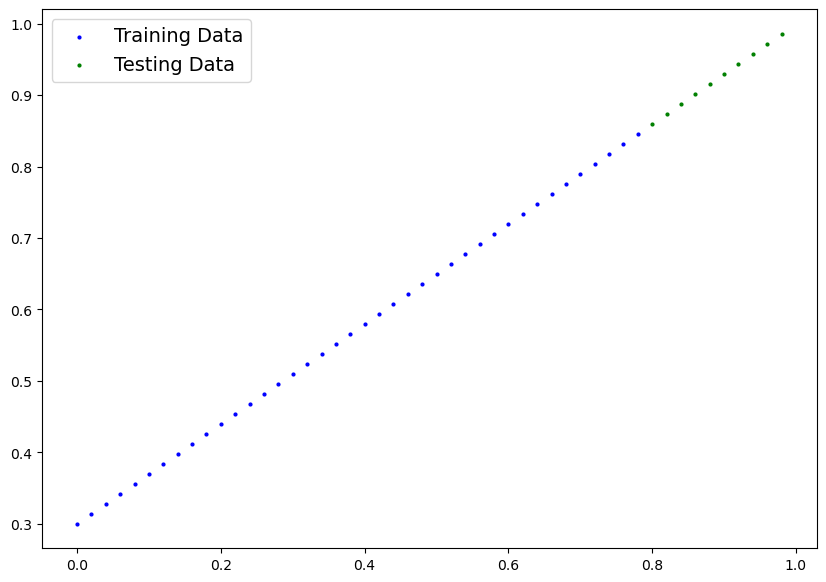

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    '''
    Plots the training data, test data and any predictions if provided
    '''
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c= 'b', s=4, label = "Training Data")

    # plot test data in green 
    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing Data")

    # plot predictions in red if provided
    if predictions != None:
        plt.scatter(test_data, predictions, c = 'r', s=4, label = "Predictions")

    # show the legend
    plt.legend(prop={"size" : 14})

    # show the plot
    plt.show()
    return None

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

## 2. Building our first PyTorch model

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real Python: https://realpython.com/python3—object-oriented-programming


What our model does :
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so?
Through two main algorithms :
1. Gradient descent
2. Backpropagation

In [8]:
from torch import nn

# Create Linear Regression Model Class

class linear_regression_model(nn.Module):  # <-- almost everything in PyTorch inherits this class 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad= True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
        
    # forward method to define the computation in the model
    def forward(self, X:torch.Tensor) -> torch.Tensor:  # <- X is the input data
        return self.weights * X + self.bias  # This is the linear regression formula

        

### PyTorch model building essentials


* torch. nn — contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch . nn. Parameter — what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch. nn. Module — The base class for all neural network modules, if you subclass it, you should overwrite forward() method

* torch. optim — this where the optimizers in PyTorch live, they will help with gradient descent

* def forward() — All nn.Module subclasses require you to overwrite forward() method, this method defines what happens in the forward computation

* See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = linear_regression_model()

# Check the model's parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
# you can generate predictions using the following command too
y_preds = model_0(X_test)
y_preds

# But this method will be slower because this also returns the grad_fn which is not calculated during torch.inference_mode(). Thus the latter works faster.

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

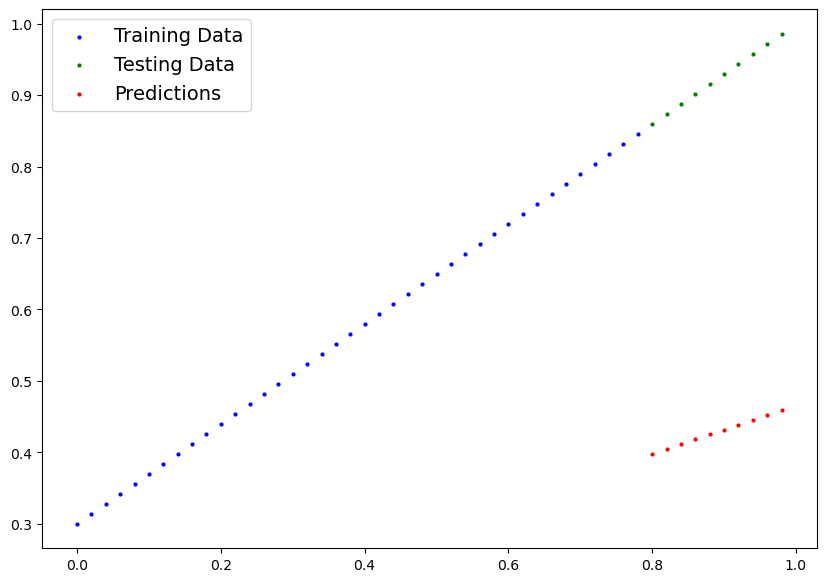

In [14]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions = y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how good or poor our model is doing, we use a loss function.

* Note: Loss function may also be called a cost function or criterion in different areas. For our use case, we are going to refer to it as loss function.

Things we need to train:

* **Loss function**: A function to measure how wrong model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of the model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
* * Inside the optimizer you'll often have to set two paramters:
* * * `params` - the model parameters you'd like to optimize for example `params = model_0.parameters()`
* * * `lr` (learning rate): The learning rate is a hyperparameter that determines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = torch.mean(torch.abs(y_preds - y_test))

loss_fn = nn.L1Loss()


# set up an optimizer (sochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.0001)  # lr - Learning rate is posibly one of the most important hyperparameter

**Q.** Which loss function and optimizer should I ues?

**A.** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular
problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will
suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of
`nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try snf improve the loss (**gradient descent**)

In [18]:
torch.manual_seed(42)
# An epoch is one loop through data
epochs = 30000  # This is our hyperparameter because we have set it ourselves
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)

    # 3. Optimizer Zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # model.eval() turns off different settings in the model not needed fir evaluation/testing (dropout, batchnorm)
    with torch.inference_mode(): # turns gradient tracking off and couple of more things behind the scenes
        # 1. do the forward pass
        y_test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(y_test_pred, y_test)

    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    # Print out whats happening
    if epoch % 1000 == 0:
        print(f"Epoch : {epoch} | Loss: {loss} | Test Loss : {test_loss}")


print(model_0.state_dict())

Epoch : 0 | Loss: 0.31288138031959534 | Test Loss : 0.4944015145301819
Epoch : 1000 | Loss: 0.1976652592420578 | Test Loss : 0.3596797585487366
Epoch : 2000 | Loss: 0.08982332795858383 | Test Loss : 0.22905269265174866
Epoch : 3000 | Loss: 0.05364571884274483 | Test Loss : 0.15158791840076447
Epoch : 4000 | Loss: 0.045492880046367645 | Test Loss : 0.11691746860742569
Epoch : 5000 | Loss: 0.04159027710556984 | Test Loss : 0.10100533813238144
Epoch : 6000 | Loss: 0.03809983655810356 | Test Loss : 0.08999161422252655
Epoch : 7000 | Loss: 0.03464643657207489 | Test Loss : 0.08100324124097824
Epoch : 8000 | Loss: 0.03121051751077175 | Test Loss : 0.07296924293041229
Epoch : 9000 | Loss: 0.027774646878242493 | Test Loss : 0.06493865698575974
Epoch : 10000 | Loss: 0.024338718503713608 | Test Loss : 0.056904666125774384
Epoch : 11000 | Loss: 0.02090274728834629 | Test Loss : 0.04886721819639206
Epoch : 12000 | Loss: 0.017466822639107704 | Test Loss : 0.040833234786987305
Epoch : 13000 | Loss: 

# 4. Making predictions with a trained model

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

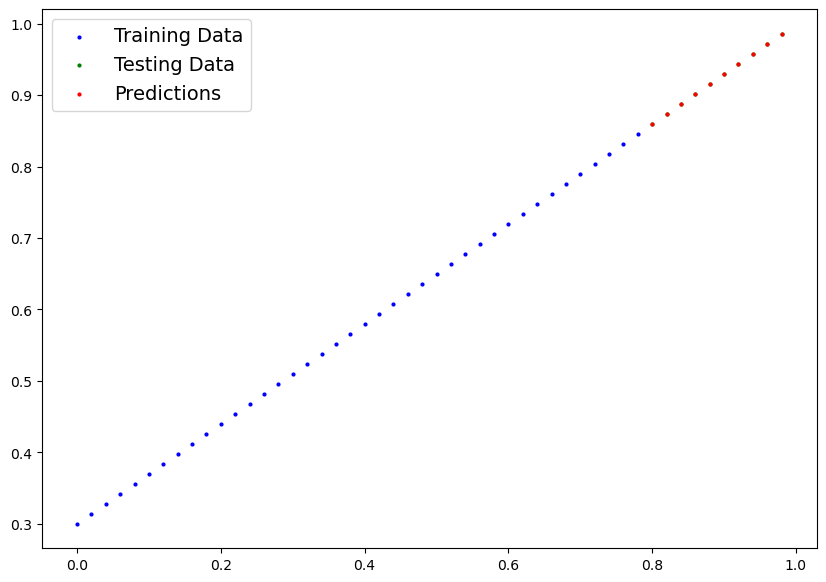

In [20]:
plot_predictions(predictions=y_preds_new)

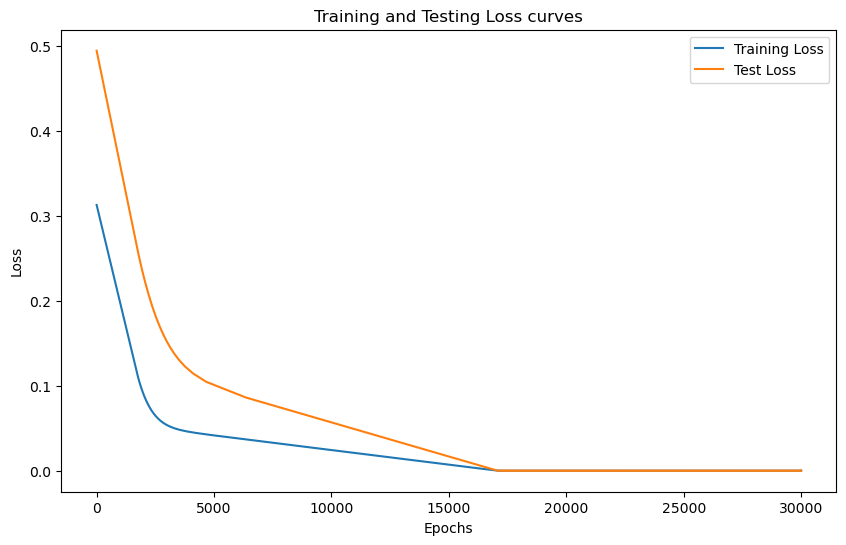

In [21]:
def experiment_tracking(epoch_count = epoch_count, loss_values = loss_values, test_loss_values = test_loss_values):
    '''
    A function to track the training and testing loss values during each epoch while training
    '''
    plt.figure(figsize=(10,6))
    plt.plot(epoch_count, loss_values, label = "Training Loss")
    plt.plot(epoch_count, test_loss_values, label = "Test Loss")
    plt.title("Training and Testing Loss curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

experiment_tracking()

## 5. Saving and loading a Model in PyTorch

### Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [22]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create a file name
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving the model to path : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving the model to path : models\01_pytorch_workflow_model_0.pth


### Loading a saved model in PyTorch

Since we save our model's `state_dict()` rather than the entire model, we'll create a new instance of the model class and load the `state_dict()` into that.

In [23]:
loaded_model_0 = linear_regression_model()
saved_model_state_dict = torch.load(f=MODEL_SAVE_PATH)

loaded_model_0.load_state_dict(saved_model_state_dict)

C:\Users\Ashutosh Choudhari\AppData\Local\Temp\ipykernel_63392\1600606632.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model_state_dict = torch.load(f=MODEL_SAV

<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

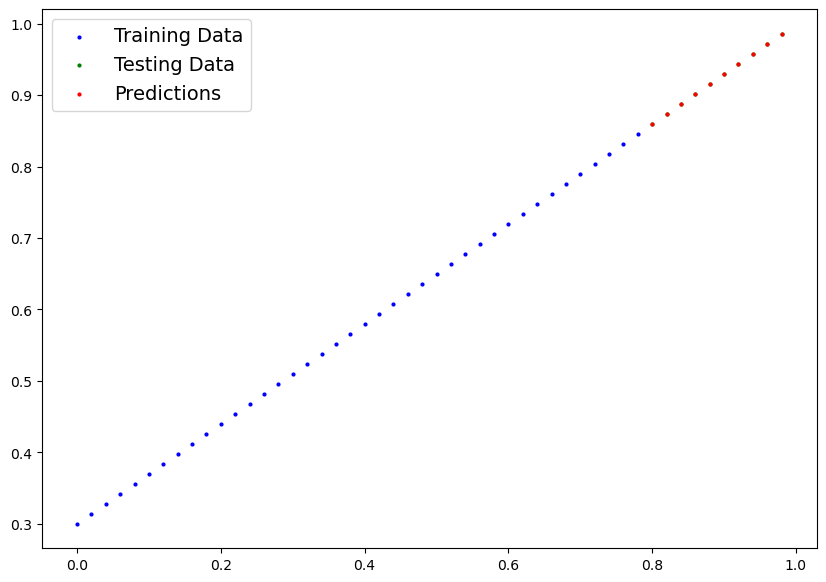

In [25]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_preds_test = loaded_model_0(X_test)

plot_predictions(predictions=loaded_preds_test)

In [26]:
loaded_preds_test == y_test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [27]:
# Import PyTorch and Matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

2.5.1


### Create device agnostic code

This means our code will run on GPU if a GPU is available. (for potentially faster computing)

If GPU is not available, our code will run on CPU.

In [28]:
# check which device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:
!nvidia-smi

Mon Dec 30 22:21:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   70C    P8             12W /   80W |    5689MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [30]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start = start, end = end, step = step).unsqueeze(dim=1)
y = weight * X + bias

#### Splitting the data in train and test sets

In [31]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(X_train.device)

cpu


In [32]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test, predictions = None):
    ''' 
        This function plots the training data vs training labels and test data vs test labels and predictions if provided in arguments
    '''

    plt.figure(figsize= (10,7))
    plt.scatter(x=train_data, y=train_labels, c="b",s = 4, label = "Training Data")
    plt.scatter(x = test_data, y = test_labels, c = "g", s = 8, label = "Testing Data")

    if predictions is not None:
        plt.scatter(x = test_data, y= predictions, c='r', s=4, label= "Predictions")

    plt.title = "Plotting Train, Test and Prediction Data"
    plt.xlabel = "data"
    plt.ylabel = "labels"
    plt.legend(prop = {"size":14})
    plt.show()
    return None


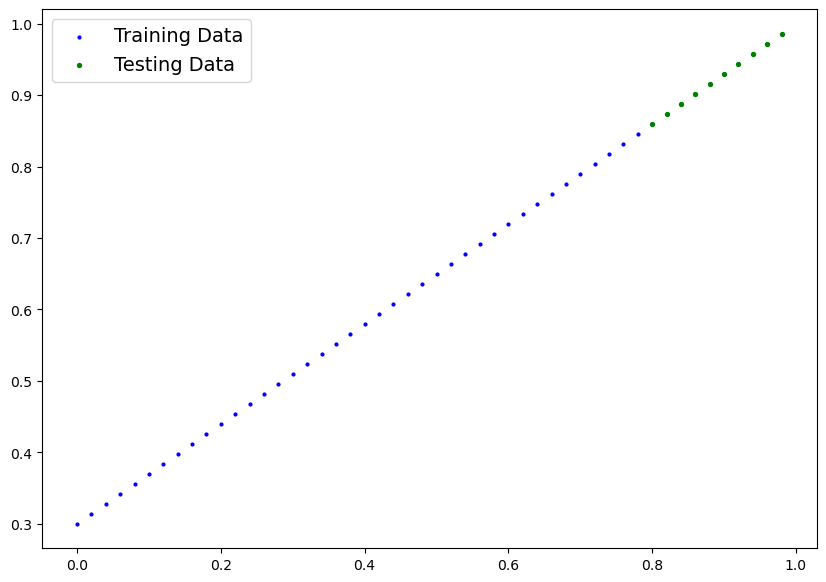

In [33]:
plot_predictions(train_data=X_train, train_labels= y_train, test_data= X_test, test_labels= y_test)


### 6.2 Building our model

In [34]:
from torch import nn

# Create Linear Regression Model Class
class linear_regression_model_v2(nn.Module):
    def __init__(self):
        super().__init__()
        ## use nn.Linear() for creating the model parameters/ also called: linear transform, dense layer, probing layer, fully connected layer.
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [35]:
torch.manual_seed(42)

model_1 = linear_regression_model_v2()

list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [36]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [37]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
model_1.to(device)
print(next(model_1.parameters()).device)

cuda:0


# 6.3 Training

* loss function

* optimizer

* training loop

* testing loop

In [39]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.001)

torch.manual_seed(42)

epochs = 3000

# lists to store the epoch, loss and test loss values
epoch_count = []
loss_values = []
test_loss_values = []

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# training
for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing
    model_1.eval()
    with torch.inference_mode():
        y_test_pred = model_1(X_test)

        test_loss = loss_fn(y_test_pred,y_test)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch} | Training loss : {loss} | Testing loss : {test_loss}")

    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

model_1.state_dict()


Epoch : 0 | Training loss : 0.5551779866218567 | Testing loss : 0.5861001014709473
Epoch : 100 | Training loss : 0.4399694502353668 | Testing loss : 0.4513919949531555
Epoch : 200 | Training loss : 0.3247610330581665 | Testing loss : 0.31668388843536377
Epoch : 300 | Training loss : 0.209552600979805 | Testing loss : 0.18197579681873322
Epoch : 400 | Training loss : 0.09434414654970169 | Testing loss : 0.04726768285036087
Epoch : 500 | Training loss : 0.024156799539923668 | Testing loss : 0.044561710208654404
Epoch : 600 | Training loss : 0.019893135875463486 | Testing loss : 0.046012092381715775
Epoch : 700 | Training loss : 0.016448119655251503 | Testing loss : 0.03835631161928177
Epoch : 800 | Training loss : 0.013014188967645168 | Testing loss : 0.030357254669070244
Epoch : 900 | Training loss : 0.009578976780176163 | Testing loss : 0.022289562970399857
Epoch : 1000 | Training loss : 0.006145037245005369 | Testing loss : 0.01429052371531725
Epoch : 1100 | Training loss : 0.00271046

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

In [40]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

# 6.4 Testing

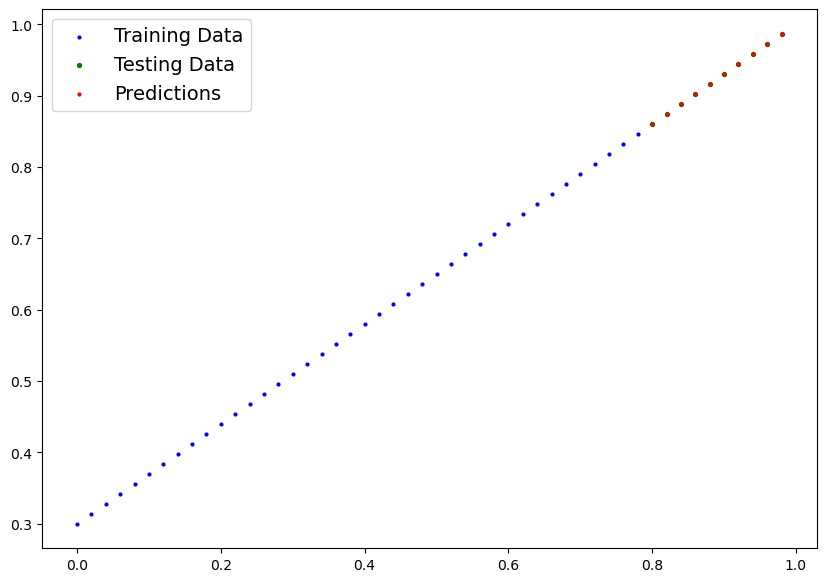

In [41]:
model_1.eval()
with torch.inference_mode():
    y_preds_new = model_1(X_test)


plot_predictions(predictions=y_preds_new.cpu())

# 6.5 Saving and loading our new model

torch.save()
torch.load()
torch.nn.Module.load_saved_dict()

In [42]:
from pathlib import Path

# 1. Create a model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok= True, parents = True)

# 2. Create a file name
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving the model to path : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving the model to path : models\01_pytorch_workflow_model_1.pth


In [43]:
new_model_state_dict = torch.load(MODEL_SAVE_PATH)

new_model_1 = linear_regression_model_v2()

new_model_1.load_state_dict(new_model_state_dict)

C:\Users\Ashutosh Choudhari\AppData\Local\Temp\ipykernel_63392\2948054659.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model_state_dict = torch.load(MODEL_SAVE_PA

<All keys matched successfully>

Parameter containing:
tensor([[0.6999]], device='cuda:0', requires_grad=True)


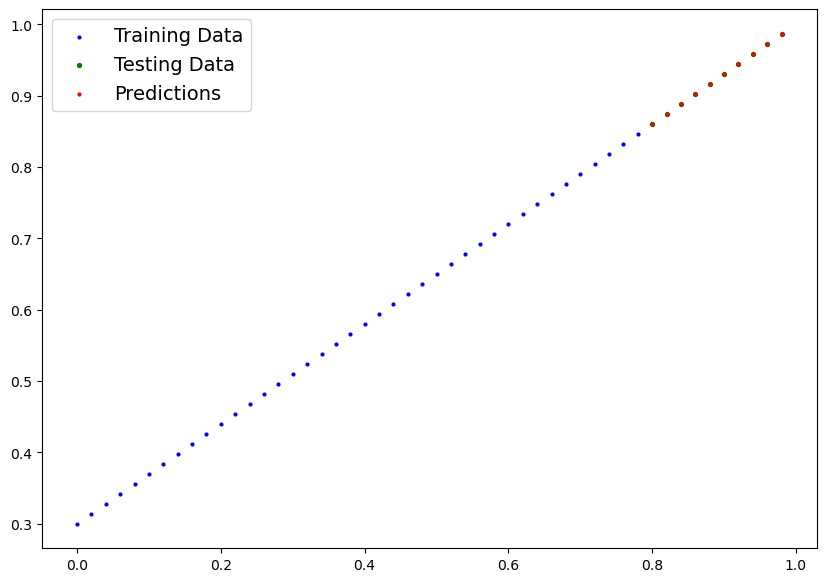

In [44]:
new_model_1.eval()
new_model_1.to(device)

print(next(new_model_1.parameters()))

with torch.inference_mode():
    loaded_preds = new_model_1(X_test)

plot_predictions(predictions = loaded_preds.cpu())

In [45]:
y_preds_new == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Exercises

In [46]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### 1. Data

In [48]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start=start, end= end, step= step,dtype=torch.float32).unsqueeze(dim=1)
y = weight * X + bias

print(X[:5],type(X), len(X))
print(y[:5],type(y),len(y))


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) <class 'torch.Tensor'> 100
tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120]]) <class 'torch.Tensor'> 100


In [49]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]

print(X_train[:5],type(X_train), len(X_train))
print(y_train[:5],type(y_train),len(y_train))
print(X_test[:5],type(X_test), len(X_test))
print(y_test[:5],type(y_test),len(y_test))

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) <class 'torch.Tensor'> 80
tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120]]) <class 'torch.Tensor'> 80
tensor([[0.8000],
        [0.8100],
        [0.8200],
        [0.8300],
        [0.8400]]) <class 'torch.Tensor'> 20
tensor([[1.1400],
        [1.1430],
        [1.1460],
        [1.1490],
        [1.1520]]) <class 'torch.Tensor'> 20


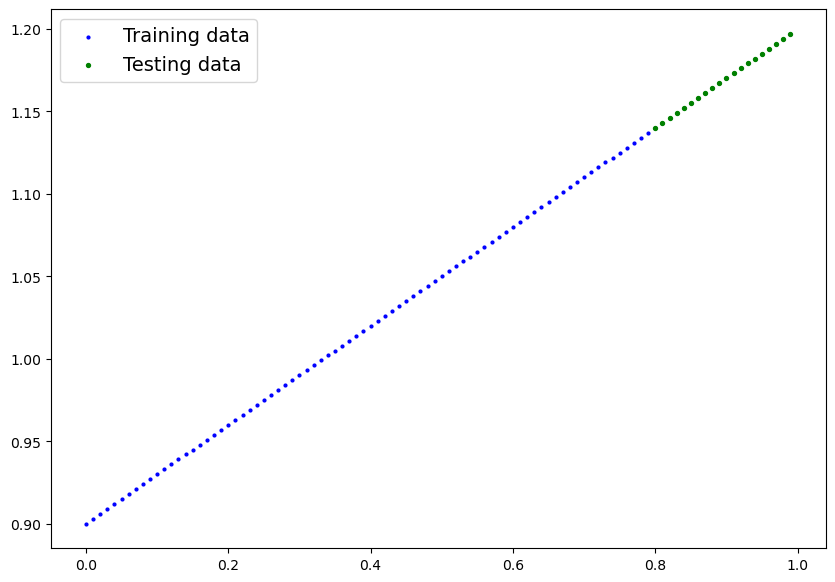

In [50]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions= None):
    """
    This functions visualises the train and test data
    """
    plt.figure(figsize=(10,7))
    plt.scatter(x=train_data, y= train_labels, c="b", s =4, label="Training data")
    plt.scatter(x=test_data, y= test_labels, c="g", s =8, label="Testing data")

    if predictions is not None:
        plt.scatter(x=test_data, y= predictions, c="r", s =4, label="prediction data")

    plt.title = "Training and Testing data"
    plt.xlabel = "data"
    plt.ylabel ="labels" 
    plt.legend(prop={'size':14})
    plt.show()

plot_predictions(train_data=X_train, train_labels = y_train, test_data= X_test,test_labels= y_test)

#### 2. Build a pytorch model

In [51]:
class Linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear_Layer = nn.Linear(in_features=1,
                                      out_features= 1)
        
    def forward(self, x : torch.Tensor) -> torch.tensor :
        return self.Linear_Layer(x)


In [52]:
model_lr = Linear_regression()

model_lr.state_dict()

OrderedDict([('Linear_Layer.weight', tensor([[-0.2343]])),
             ('Linear_Layer.bias', tensor([0.9186]))])

In [53]:
loss_fn  = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_lr.parameters(),
                            lr = 0.01)

#### 3. Training

In [54]:
torch.manual_seed(42)

epochs = 300

model_lr.to(device)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):

    #training
    model_lr.train()

    y_pred = model_lr(X_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #testing
    if epoch % 20 == 0:
        model_lr.eval()

        with torch.inference_mode():
            y_pred_test = model_lr(X_test)

            test_loss = loss_fn(y_pred_test, y_test)

        # To understand whats happening
        print(f"Epoch : {epoch} | Training Loss : {loss} | Testing Loss : {test_loss}")

model_lr.state_dict()
    

Epoch : 0 | Training Loss : 0.1934860497713089 | Testing Loss : 0.44704076647758484
Epoch : 20 | Training Loss : 0.099742591381073 | Testing Loss : 0.2774539589881897
Epoch : 40 | Training Loss : 0.08286076784133911 | Testing Loss : 0.20952367782592773
Epoch : 60 | Training Loss : 0.07524622976779938 | Testing Loss : 0.17951278388500214
Epoch : 80 | Training Loss : 0.06834527105093002 | Testing Loss : 0.16077637672424316
Epoch : 100 | Training Loss : 0.06149417161941528 | Testing Loss : 0.1444476842880249
Epoch : 120 | Training Loss : 0.05464210733771324 | Testing Loss : 0.12846294045448303
Epoch : 140 | Training Loss : 0.0477910041809082 | Testing Loss : 0.11213427037000656
Epoch : 160 | Training Loss : 0.0409398227930069 | Testing Loss : 0.09580682963132858


Epoch : 180 | Training Loss : 0.03408766910433769 | Testing Loss : 0.07982330769300461
Epoch : 200 | Training Loss : 0.027236467227339745 | Testing Loss : 0.06349574029445648
Epoch : 220 | Training Loss : 0.020384782925248146 | Testing Loss : 0.04734015464782715
Epoch : 240 | Training Loss : 0.01353358756750822 | Testing Loss : 0.03101258911192417
Epoch : 260 | Training Loss : 0.006681409664452076 | Testing Loss : 0.015028977766633034
Epoch : 280 | Training Loss : 0.003223964711651206 | Testing Loss : 0.006560087203979492


OrderedDict([('Linear_Layer.weight', tensor([[0.2925]], device='cuda:0')),
             ('Linear_Layer.bias', tensor([0.8997], device='cuda:0'))])

#### 4. Inference

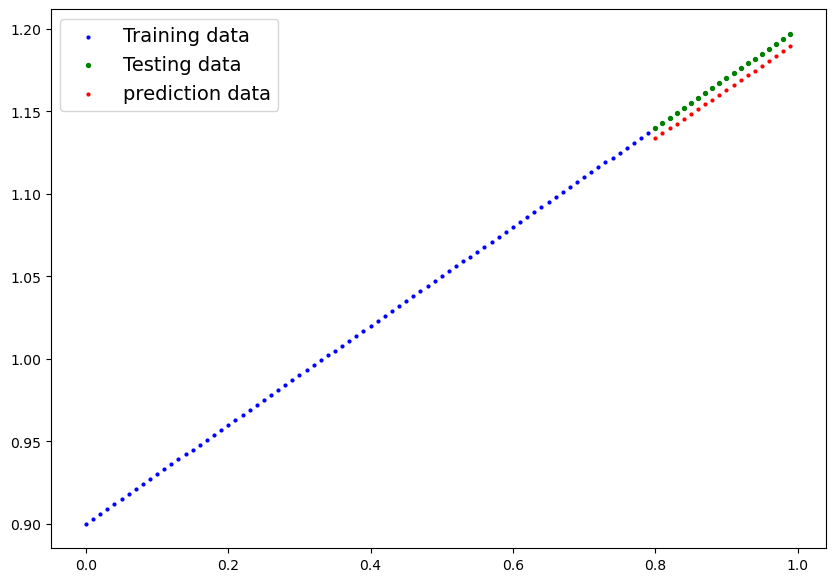

In [55]:
model_lr.eval()
with torch.inference_mode():
    y_preds = model_lr(X_test)

plot_predictions(predictions=y_preds.cpu())

#### 5. Saving and loading the model

In [56]:
from pathlib import Path

MODEL_PATH =Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_lr.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_2.pth


In [57]:
new_model = Linear_regression()

new_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

C:\Users\Ashutosh Choudhari\AppData\Local\Temp\ipykernel_63392\391888567.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load(MODEL_SAVE_

<All keys matched successfully>

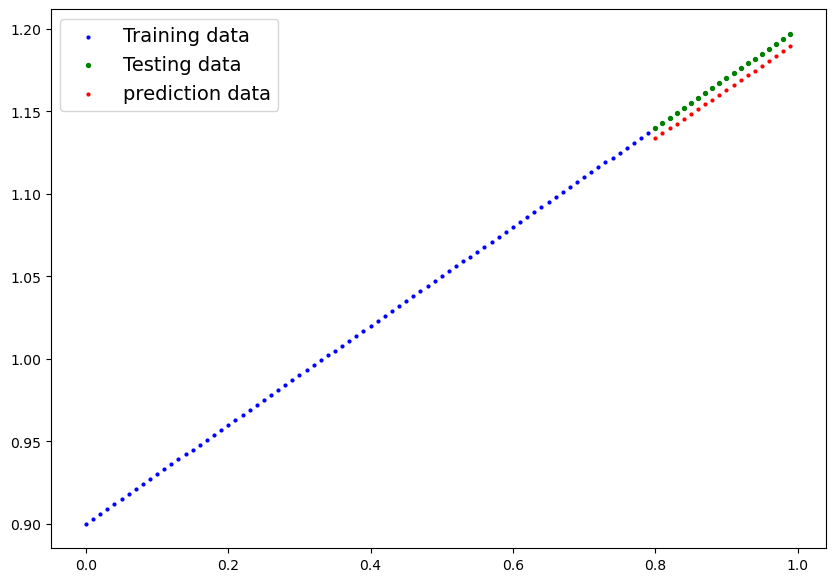

In [58]:
model_lr.eval()
with torch.inference_mode():
    y_preds_new = model_lr(X_test)

plot_predictions(predictions=y_preds.cpu())

In [59]:
y_preds_new == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')